<a href="https://colab.research.google.com/github/lyhSuc/DataStructure/blob/master/mnist2_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.4 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 1.2 MB 35.5 MB/s 
     |████████████████████████████████| 189 kB 46.1 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 51 kB 312 kB/s 
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [ ]:
 path = untar_data(URLs.MNIST)
Path.BASE_PATH = path

In [ ]:
(path/"training").ls()


(#10) [Path('training/3'),Path('training/8'),Path('training/4'),Path('training/5'),Path('training/2'),Path('training/6'),Path('training/7'),Path('training/9'),Path('training/0'),Path('training/1')]

In [ ]:
(path/"testing").ls()

(#10) [Path('testing/3'),Path('testing/8'),Path('testing/4'),Path('testing/5'),Path('testing/2'),Path('testing/6'),Path('testing/7'),Path('testing/9'),Path('testing/0'),Path('testing/1')]

In [ ]:
twos = (path/'training'/'2').ls().sorted()
nines = (path/'training'/'9').ls().sorted()
im2_path = twos[1]
im2 = Image.open(im2_path)
im2

In [ ]:
tensor(im2)[5:20,5:20]


tensor([[  0,   0,   0,  25, 228,  95,   0,   0,   0, 113, 250, 254, 219,  24,   0],
        [  0,   0,   0,  11,  41,   0,   0,   0,   0,   0,  80, 210, 254, 167,  22],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  75, 254, 254, 113],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  28, 223, 254, 161],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 124, 254, 223],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  82, 254, 254],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  82, 254, 254],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  82, 254, 254],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 115, 254, 229],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  23, 220, 254, 161],
        [  0,   0,   0,   0,   0,  12,  82,  82,  82,  82,  82,  93, 254, 254, 122],
        [  0,   0,   0,   0,  54, 173, 254, 254, 254, 254, 254, 2

In [ ]:
im2_t = tensor(im2)
df = pd.DataFrame(im2_t[5:20,5:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,0,25,228,95,0,0,0,113,250,254,219,24,0,0,0
1,0,0,0,11,41,0,0,0,0,0,80,210,254,167,22,0,0
2,0,0,0,0,0,0,0,0,0,0,0,75,254,254,113,0,0
3,0,0,0,0,0,0,0,0,0,0,0,28,223,254,161,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,124,254,223,20,0
5,0,0,0,0,0,0,0,0,0,0,0,0,82,254,254,30,0
6,0,0,0,0,0,0,0,0,0,0,0,0,82,254,254,30,0
7,0,0,0,0,0,0,0,0,0,0,0,0,82,254,254,30,0
8,0,0,0,0,0,0,0,0,0,0,0,0,115,254,229,22,0
9,0,0,0,0,0,0,0,0,0,0,0,23,220,254,161,0,0


In [ ]:
nine_tensors = [tensor(Image.open(o)) for o in nines]
two_tensors = [tensor(Image.open(o)) for o in twos]
len(two_tensors), len(nine_tensors)


(5958, 5949)

In [ ]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28,1))
bias = init_params(1)

In [ ]:
stacked_twos = torch.stack(two_tensors).float()/255
stacked_nines = torch.stack(nine_tensors).float()/255

In [ ]:
valid_2_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'2').ls()])
valid_2_tens = valid_2_tens.float()/255
valid_9_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'testing'/'9').ls()])
valid_2_tens = valid_2_tens.float()/255
valid_9_tens.shape,valid_9_tens.shape #just to check whether both tensors are of the same size

(torch.Size([1009, 28, 28]), torch.Size([1009, 28, 28]))

In [ ]:
train_x = torch.cat([stacked_twos, stacked_nines]).view(-1, 28*28)
train_y = tensor([1]*len(twos) + [0]*len(nines)).unsqueeze(1)
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y


(torch.Size([784]), tensor([1]))

In [ ]:
valid_x = torch.cat([valid_2_tens, valid_9_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_2_tens) + [0]*len(valid_9_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [ ]:
dl = DataLoader(dset, batch_size = 256)
xb,yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
valid_dl = DataLoader(valid_dset,batch_size = 256)

In [ ]:
(train_x[0]*weights.T).sum() + bias

tensor([-12.3864], grad_fn=<AddBackward0>)

In [ ]:
def linear1(xb): return xb@weights + bias
batch = train_x[:4]
batch.shape
preds = linear1(batch)
preds

tensor([[-12.3864],
        [ -6.0706],
        [-12.1019],
        [ -6.3618]], grad_fn=<AddBackward0>)

In [ ]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()
def sigmoid(x): return 1/(1+torch.exp(-x))


In [ ]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [ ]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.9990, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0001), tensor([-0.0010]))

In [ ]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()



In [ ]:
weights.grad.zero_()
bias.grad.zero_();

In [ ]:

def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()


  

In [ ]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.)

In [ ]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [ ]:
validate_epoch(linear1)


0.9389

In [ ]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.9896

In [ ]:
for i in range(25):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.994 0.9941 0.995 0.9941 0.9951 0.9951 0.9951 0.9951 0.9956 0.9956 0.9956 0.9956 0.9956 0.9956 0.9956 0.9956 0.9951 0.9946 0.9946 0.9946 0.9946 0.9946 0.9946 0.9946 0.9946 

In [ ]:
linear_model = nn.Linear(28*28,1)
w,b = linear_model.parameters()
w.shape,b.shape
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None
opt = BasicOptim(linear_model.parameters(), lr)
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()
validate_epoch(linear_model)


0.2812

In [ ]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ') 

In [ ]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)


0.5039 0.5039 0.5039 0.4961 0.4956 0.4956 0.4956 0.4951 0.4951 0.4946 0.4946 0.4946 0.4946 0.4946 0.4946 0.4941 0.4941 0.4941 0.4941 0.4941 

In [ ]:
def simple_net(xb):
  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = res@w2 + b2
  return res
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [ ]:
dls = DataLoaders(dl,valid_dl)

In [ ]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(15,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.009757,0.242438,0.995100,00:00
1,0.009730,0.242216,0.996080,00:00
2,0.009698,0.241988,0.996080,00:00
3,0.009664,0.241760,0.996080,00:00
4,0.009629,0.241526,0.996080,00:00
5,0.009593,0.241288,0.996080,00:00
6,0.009557,0.241049,0.996570,00:00
7,0.009521,0.240807,0.996570,00:00
8,0.009486,0.240560,0.996570,00:00
9,0.009450,0.240313,0.996570,00:00


In [ ]:
m = learn.model
m 

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

In [ ]:
w,b = m[0].parameters()

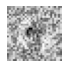

In [ ]:
show_image(w[29].view(28,28))

In [ ]:
cnn_learner??